## Описание проекта

#### Данные взаимодействий с рекламными объявлениями на некоторой площадке за 6 дней 
----------------------------------------------------------------------------------------------------------------

1. Разберемся с распределением количества показов и кликов. Посчитайте среднее количество показов и среднее количество кликов на объявления за весь период (округлите до целых).

2. Нарисуйте график распределения показов на объявление за весь период.

3. А теперь давайте посчитаем скользящее среднее показов с окном 2. Какое значение скользящего среднего получим за 6 апреля 2019 года (ответ округлите до целых)?

4. Скользящее среднее часто используется для поиска аномалий в данных. Давайте попробуем нанести на один график значения арифметического среднего по дням и скользящего среднего количества показов. В какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? Дни, в которых скользящее среднее равно NaN, не учитываем. 

5. Найдите проблемное объявление (с наибольшим/наименишим количеством показов) в день, в который была замечена самая большая по модулю аномалия. 


 **описание данных:**
 
ads_data.csv – данные взаимодействий с рекламными объявлениями

- date – дата

- time – время

- event – действие (просмотр/клик)

- platform – платформа

- ad_id – id объявления

- client_union_id – id рекламного кабинета

- campaign_union_id – id рекламной кампании

- ad_cost_type – тип оплаты

- ad_cost – цена

- has_video – есть ли видео

- target_audience_count – размер аудитории


#### Откроем файлы и продобработаем данные 

In [190]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
import numpy as np

warnings.filterwarnings('ignore')
%matplotlib inline

In [191]:
ads_data = pd.read_csv('/Users/v.obrosova/Documents/СТАТИСТИКА/csv/ads/ads_data.csv')
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [192]:
ads_data.shape

(1000000, 11)

In [195]:
ads_data.isna().sum()

date                     0
time                     0
event                    0
platform                 0
ad_id                    0
client_union_id          0
campaign_union_id        0
ad_cost_type             0
ad_cost                  0
has_video                0
target_audience_count    0
dtype: int64

**создадим новую колонку с датой без времени, для удобства дальнейшей работы**

In [198]:
ads_data['full_date'] = pd.to_datetime(ads_data.time).dt.date
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,full_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2019-04-01
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011,2019-04-01
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410,2019-04-01
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711,2019-04-01
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501,2019-04-01


In [199]:
ads_data.dtypes

date                      object
time                      object
event                     object
platform                  object
ad_id                      int64
client_union_id            int64
campaign_union_id          int64
ad_cost_type              object
ad_cost                  float64
has_video                  int64
target_audience_count      int64
full_date                 object
dtype: object

In [200]:
ads_data['date'] = pd.to_datetime(ads_data.date)
ads_data['full_date'] = pd.to_datetime(ads_data.full_date)
ads_data.dtypes

date                     datetime64[ns]
time                             object
event                            object
platform                         object
ad_id                             int64
client_union_id                   int64
campaign_union_id                 int64
ad_cost_type                     object
ad_cost                         float64
has_video                         int64
target_audience_count             int64
full_date                datetime64[ns]
dtype: object

По итогу первого шага предобработки данных:

  
    - создана новая колонка даты без времени
    - отредактированы типы данных колонок с датой 

### 1.Посчитайте среднее количество показов и среднее количество кликов на объявления за весь период (округлите до целых).

In [201]:
number_per_ad_per_event = ads_data.groupby(['ad_id','event'], as_index = False)\
                                  .agg({'time':'count'})\
                                  .rename(columns = {'time':'event_number'})

In [202]:
pivot_per_ad_per_event = avg_events.pivot(index = 'ad_id',\
                                          columns = 'event',\
                                          values = 'count')\
                                    .fillna(0)
pivot_per_ad_per_event.head()

event,click,view
ad_id,,
2,1.0,101.0
3,3.0,184.0
1902,1.0,41.0
2064,0.0,35.0
2132,1.0,58.0


In [203]:
round(pivot_per_ad_per_event.mean())

event
click    113.0
view     923.0
dtype: float64

среднее количество кликов = 113.0, а показова = 923.0

### 2.Нарисуйте график распределения показов на объявление за весь период.

In [204]:
view_per_ad = number_per_ad_per_event.query('event == "view"')
view_per_ad.head()

,ad_id,event,event_number
1,2,view,101
3,3,view,184
5,1902,view,41
6,2064,view,35
8,2132,view,58


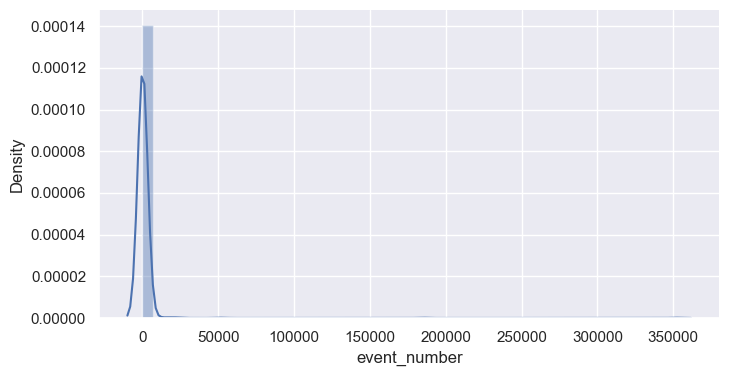

In [205]:
sns.distplot(view_per_ad.event_number)
sns.despine()

In [206]:
view_per_ad.event_number.describe().round()

count       956.0
mean        932.0
std       13006.0
min          10.0
25%          36.0
50%          84.0
75%         209.0
max      351802.0
Name: event_number, dtype: float64

In [207]:
view_per_ad.event_number.idxmax()

1221

In [208]:
view_per_ad.event_number.max()

351802

на графике обнуружили обьявление с большим числом просмотров = 350000, причем среднее число обьявлений = 932, медиана = 84.0

это обьявление c большим числом просмотров № 1221, число просмотров = 351802

**посмотрим на форму распределения графика ближе, так как мы работаем с множеством небольшим значений для этого используем метод логорифмирования чтобы сгладить выбросы**

In [209]:
view_per_ad['log_views'] = np.log(view_per_ad.event_number)
view_per_ad.head()

,ad_id,event,event_number,log_views
1,2,view,101,4.615121
3,3,view,184,5.214936
5,1902,view,41,3.713572
6,2064,view,35,3.555348
8,2132,view,58,4.060443


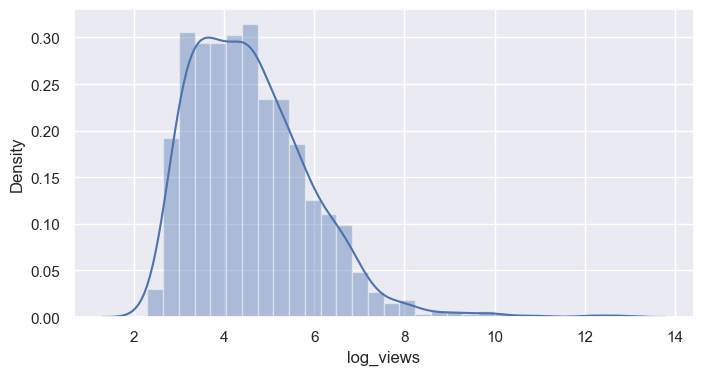

In [210]:
sns.distplot(view_per_ad.log_views)
sns.set()

In [211]:
view_per_ad.log_views.describe().round(2)

count    956.00
mean       4.60
std        1.33
min        2.30
25%        3.58
50%        4.43
75%        5.34
max       12.77
Name: log_views, dtype: float64

значение медианы = 4.43 
       и среднего = 4.60 , данные сгладились и распределение удалось увидеть ближе

### 3. А теперь давайте посчитаем скользящее среднее показов с окном 2. 
 -Какое значение скользящего среднего получим за 6 апреля 2019 года (ответ округлите до целых)?

**для начала найдем среднее число обьявлений по каждой дате**

In [212]:
ads_view_per_date = ads_data.query('event == "view"')\
                            .pivot_table(index = 'ad_id',
                                         columns = 'date',
                                         values = 'time',
                                         aggfunc = 'count')
ads_view_per_date

date,2019-04-01,2019-04-02,2019-04-03,2019-04-04,2019-04-05,2019-04-06
ad_id,,,,,,
2,83.0,18.0,NaN,NaN,NaN,NaN
3,158.0,26.0,NaN,NaN,NaN,NaN
1902,NaN,NaN,34.0,7.0,NaN,NaN
2064,NaN,28.0,7.0,NaN,NaN,NaN
2132,NaN,NaN,25.0,27.0,6.0,NaN
...,...,...,...,...,...,...
122004,85.0,15.0,NaN,NaN,NaN,NaN
122013,NaN,NaN,NaN,134.0,22.0,NaN
122023,NaN,NaN,NaN,53.0,15.0,NaN


In [213]:
ads_view_per_date.mean()

date
2019-04-01    154.482270
2019-04-02    137.786982
2019-04-03    163.952778
2019-04-04    675.901720
2019-04-05    919.109677
2019-04-06    277.122727
dtype: float64

мы получили средние значения по датам , всего 6 дат

In [214]:
mean_views = ads_view_per_date.mean()
mean_views.head()

date
2019-04-01    154.482270
2019-04-02    137.786982
2019-04-03    163.952778
2019-04-04    675.901720
2019-04-05    919.109677
dtype: float64

In [215]:
rolling_views = mean_views.rolling(2).mean()
rolling_views

date
2019-04-01           NaN
2019-04-02    146.134626
2019-04-03    150.869880
2019-04-04    419.927249
2019-04-05    797.505699
2019-04-06    598.116202
dtype: float64

In [216]:
rolling_views['2019-04-06'].round()

598.0

среднее число показов 6 апреля 2019 года = 598.0

### 4. Проверить наличие аномалий с помощью скользящего среднего.   
    - Нанести на один график значения арифметического среднего по дням и скользящего среднего количества показов 
    - В какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? 
    Дни, в которых скользящее среднее равно NaN, не учитываем. 

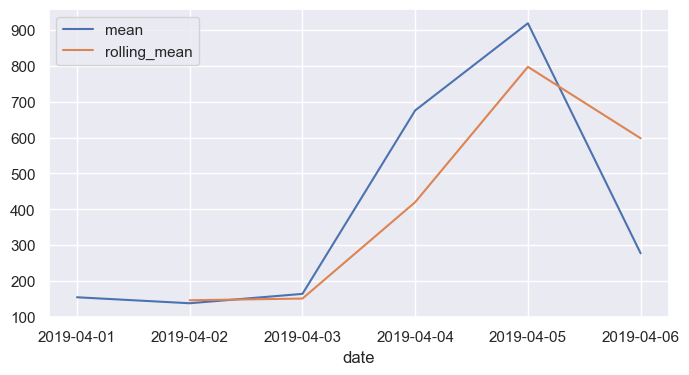

In [217]:
sns.lineplot(mean_views, label = 'mean')
sns.lineplot(rolling_views, label = 'rolling_mean')
sns.set()


In [222]:
abs = (mean_views - rolling_views).abs()
abs

date
2019-04-01           NaN
2019-04-02      8.347644
2019-04-03     13.082898
2019-04-04    255.974471
2019-04-05    121.603979
2019-04-06    320.993475
dtype: float64

In [223]:
abs.idxmax()

Timestamp('2019-04-06 00:00:00')

Наибольшая разница по модулю наблюдается 2019-04-06 

### 5. найдете проблемное объявление (с наибольшим/наименишим количеством показов) в день, в который была замечена самая большая по модулю аномалия. 

Если разница между средним и скользящим средним отрицательная то будем искать обьявление с максимальным числом просмотров, если разница положительная ищем наименьшее число просмотров

In [225]:
#день аномалии 
anomaly_day = abs.idxmax()

In [232]:
#запишем размер аномалии в переменную
difference_value = (mean_views - rolling_views)[anomaly_day]

#поиск макисмального числа просмотров
if difference_value <= 0:
    anomaly_ad = ads_view_per_date[anomaly_day].idxmax()
#поиск минимального числа просмотров
else:
    anomaly_ad = ads_view_per_date[anomaly_day].idxmin()
    
anomaly_ad

112583

найдено обьявление №112583, это обьявление с самым большим числом показов